In [4]:
import pandas as pd
names1880 =pd.read_csv("datasets/babynames/yob1880.txt", header=None, names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [10]:
# 성별별 출생수합
names1880.groupby('sex').sum()['births']
names1880.groupby('sex').births.sum() #같은 의미!

sex
F     90993
M    110493
Name: births, dtype: int64

In [25]:
years=range(1880,2011)
pieces=[]
for year in years:
    path="datasets/babynames/yob%d.txt" %year
    frame=pd.read_csv(path, names=['name','sex','births'])
#     print(type(frame))
    frame['year']=year
    pieces.append(frame)
names=pd.concat(pieces, ignore_index=True)
print(names)
# print(pieces)
#     path="datasets/babynames/yob"+str(year)+".txt"
#     print(path)

              name sex  births  year
0             Mary   F    7065  1880
1             Anna   F    2604  1880
2             Emma   F    2003  1880
3        Elizabeth   F    1939  1880
4           Minnie   F    1746  1880
5         Margaret   F    1578  1880
6              Ida   F    1472  1880
7            Alice   F    1414  1880
8           Bertha   F    1320  1880
9            Sarah   F    1288  1880
10           Annie   F    1258  1880
11           Clara   F    1226  1880
12            Ella   F    1156  1880
13        Florence   F    1063  1880
14            Cora   F    1045  1880
15          Martha   F    1040  1880
16           Laura   F    1012  1880
17          Nellie   F     995  1880
18           Grace   F     982  1880
19          Carrie   F     949  1880
20           Maude   F     858  1880
21           Mabel   F     808  1880
22          Bessie   F     794  1880
23          Jennie   F     793  1880
24        Gertrude   F     787  1880
25           Julia   F     783  1880
2

In [26]:
#연도별/성별 신생아 수 구하기

<IPython.core.display.Javascript object>


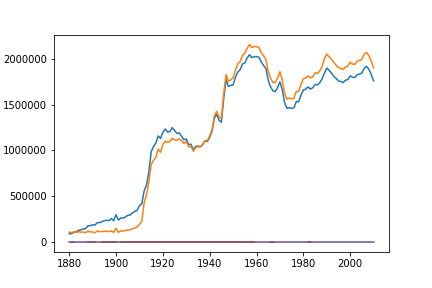

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
1885,133056,107802
1886,144538,110785
1887,145983,101412
1888,178631,120857


In [39]:
total_births=names.pivot_table('births', index='year', columns='sex',aggfunc=sum)
total_births.plot(title="Total births by sex and year")
# %matplotlib notebook
# import matplotlib.pyplot as plt
# plt.plot(total_births)
# total_births
# total_births.loc['sum']=total_births.sum()

<IPython.core.display.Javascript object>


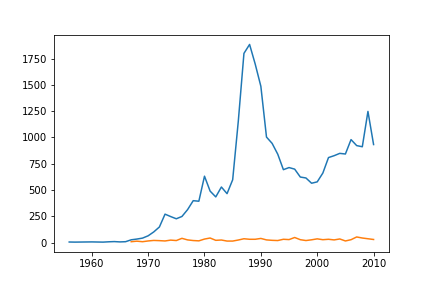

In [82]:
# names.groupby(['year','sex']).births.sum()
def add_prop(group):
    births=group.births
    group['prop']=births/group.births.sum()
    return group
names=names.groupby(['year','sex']).apply(add_prop)
essie=names[names.name=='Sasha']
essie
fessie=essie[essie.sex=='F']
fessie
se_births=essie.pivot_table('births', index='year', columns='sex',aggfunc=sum)
se_births
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(se_births)

In [49]:
import numpy as np
np.allclose(names.groupby(['year', 'sex']).prop.sum(),1)

True

## 연도별 성별에 따른 빈도수가 가장 높은 이름 추출

In [83]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped=names.groupby(['year','sex'])
top1000=grouped.apply(get_top1000)
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011484
         15          Martha   F    1040  1880  0.011429
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     794  1880  0.008726
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2010 M   1677617       Yair   M     201  2010  0.000106
         1677616      Talan   M     201  2010  0.000106
         1677614      Keyon   M     201  2010  0.000106
         1677613       Kael   M     201  2010  0.000106
         1677618   Demarion   M     200  2010  0.000105
         1677619     Gibson   M     200  2010  0.000105
         1677620     Reagan   M     200  2010  0.000105
         1677621  Cristofer   M     199  2010  0.000105
         1677622     Daylen   M     199  2010  0.000105
         1677623     Jordon   M     199  2010  0.000105
         1677624    Dashawn   M     198  2010  0.000104
         1677625      Masen   M     198  2010  0.000104
         1677629      Rowen   M     197  2010  0.000104
         1677631     Yousef   M     197  2010  0.000104
         1677630   Thaddeus   M     197  2010  0.000104
         1677628      Kadin   M     197  2010  0.000104
         1677627     Dillan   M     197  2010  0.000104
         1677626   Clarence   M     197  2010  0.000104
         1677634      Slade   M     196  2010  0.000103
         1677632    Clinton   M     196  2010  0.000103
         1677633    Sheldon   M     196  2010  0.000103
         1677636    Keshawn   M     195  2010  0.000103
         1677637   Menachem   M     195  2010  0.000103
         1677635     Joziah   M     195  2010  0.000103
         1677638     Bailey   M     194  2010  0.000102
         1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

In [59]:
boys=top1000[top1000.sex=='M']
girls=top1000[top1000.sex=='F']

In [86]:
#연도별로 John, Mary 이름의 추이를 그래프로 시각화
#연도와 이름에 대한 전체 출생수를 피벗테이블로 생성
total_births=top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)
total_births.info()

C:\Users\user\anac\lib\site-packages\pandas\core\reshape\pivot.py:82: FutureWarning: 'year' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys, observed=dropna)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


<IPython.core.display.Javascript object>


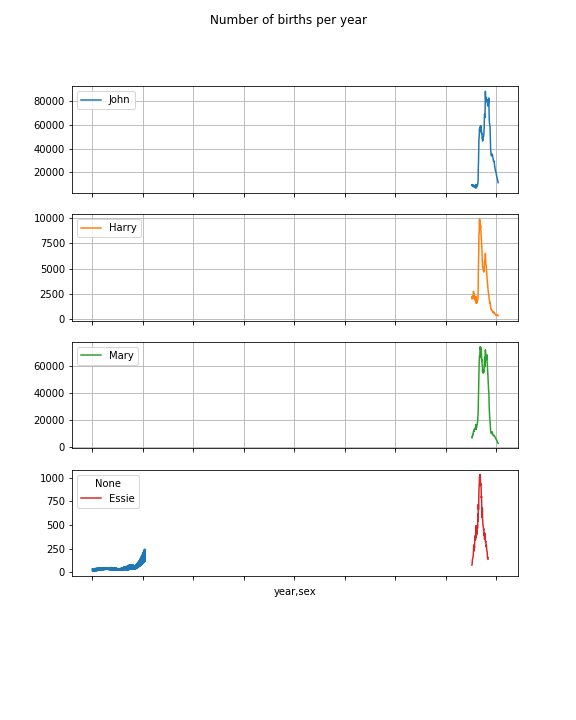

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BCE6D68>,
      dtype=object)

In [104]:
subset=total_births[['John','Harry','Mary','Essie']]
subset.plot(title="Number of births per year" ,figsize=(8,10),grid=True,subplots=True)

In [107]:
df=boys[boys.year==2010]

In [115]:
df.sort_values(by='prop').prop.cumsum() #누적합으로 비율을 구할 수 있다.
#여기서는 2010년 상위 1000위까지 이름의 비율이 약 84%인 것을 알 수 있다.

name sex  births  year      prop
year sex                                                 
2010 M   1677645       Maxton   M     193  2010  0.000102
         1677638       Bailey   M     194  2010  0.000102
         1677639       Camilo   M     194  2010  0.000102
         1677642       Jaydan   M     194  2010  0.000102
         1677641       Jaquan   M     194  2010  0.000102
         1677640       Destin   M     194  2010  0.000102
         1677637     Menachem   M     195  2010  0.000103
         1677635       Joziah   M     195  2010  0.000103
         1677636      Keshawn   M     195  2010  0.000103
         1677634        Slade   M     196  2010  0.000103
         1677633      Sheldon   M     196  2010  0.000103
         1677632      Clinton   M     196  2010  0.000103
         1677629        Rowen   M     197  2010  0.000104
         1677631       Yousef   M     197  2010  0.000104
         1677626     Clarence   M     197  2010  0.000104
         1677628        Kadin   M     197  2010  0.000104
         1677627       Dillan   M     197  2010  0.000104
         1677630     Thaddeus   M     197  2010  0.000104
         1677625        Masen   M     198  2010  0.000104
         1677624      Dashawn   M     198  2010  0.000104
         1677623       Jordon   M     199  2010  0.000105
         1677622       Daylen   M     199  2010  0.000105
         1677621    Cristofer   M     199  2010  0.000105
         1677618     Demarion   M     200  2010  0.000105
         1677619       Gibson   M     200  2010  0.000105
         1677620       Reagan   M     200  2010  0.000105
         1677614        Keyon   M     201  2010  0.000106
         1677616        Talan   M     201  2010  0.000106
         1677617         Yair   M     201  2010  0.000106
         1677615     Kingsley   M     201  2010  0.000106
...                       ...  ..     ...   ...       ...
         1676673         Liam   M   10852  2010  0.005716
         1676672    Christian   M   10965  2010  0.005776
         1676671     Jonathan   M   11028  2010  0.005809
         1676670       Nathan   M   11269  2010  0.005936
         1676669         John   M   11424  2010  0.006018
         1676668      Jackson   M   11693  2010  0.006159
         1676667       Samuel   M   11776  2010  0.006203
         1676666         Ryan   M   11886  2010  0.006261
         1676665     Benjamin   M   12280  2010  0.006469
         1676664      Gabriel   M   12722  2010  0.006701
         1676663       Joseph   M   13657  2010  0.007194
         1676662        James   M   13714  2010  0.007224
         1676661       Elijah   M   13735  2010  0.007235
         1676660        Logan   M   13943  2010  0.007345
         1676659      Matthew   M   13954  2010  0.007350
         1676658        David   M   14042  2010  0.007397
         1676657       Andrew   M   14093  2010  0.007424
         1676656  Christopher   M   14135  2010  0.007446
         1676655        Mason   M   14728  2010  0.007758
         1676654       Joshua   M   15238  2010  0.008027
         1676653      Anthony   M   15364  2010  0.008093
         1676652        Aiden   M   15403  2010  0.008114
         1676651       Daniel   M   15679  2010  0.008259
         1676650         Noah   M   16281  2010  0.008576
         1676649    Alexander   M   16634  2010  0.008762
         1676648      William   M   16870  2010  0.008887
         1676647       Jayden   M   17030  2010  0.008971
         1676646      Michael   M   17133  2010  0.009025
         1676645        Ethan   M   17866  2010  0.009411
         1676644        Jacob   M   21875  2010  0.011523

[1000 rows x 5 columns]

In [120]:
prop_cumsum=df.sort_values(by='prop',ascending=False).prop.cumsum()
prop_cumsum[:10]
#누적합이 0.5가 되는 위치 추출
prop_cumsum.values.searchsorted(0.5) # result:116, wmr 117번째 위치

116

In [121]:
df=boys[boys.year==1900]
in1900=df.sort_values(by='prop',ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5)

24

C:\Users\user\anac\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'year' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  after removing the cwd from sys.path.
C:\Users\user\anac\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'sex' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


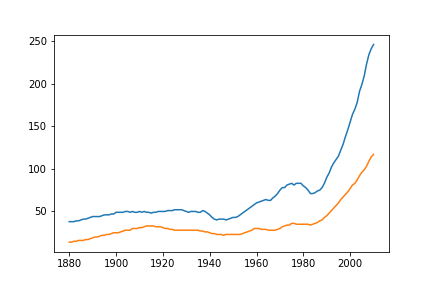

<IPython.core.display.Javascript object>


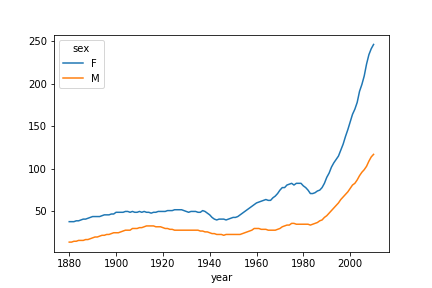

In [134]:
def get_quantile_count(group,q=0.5):
    group=group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q)+1
diversity=top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity=diversity.unstack('sex')
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(diversity)
diversity.plot()